In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib

# 1. Generate Datasets

In [2]:
sample_per_class = 500

In [3]:
label = np.concatenate([np.zeros(sample_per_class),np.ones(sample_per_class)]).astype(int)

In [4]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
def myplot(data,label):
    colors = ListedColormap(['red','blue'])
    plt.figure(figsize=(7,7))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    scatterplot = plt.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    plt.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])

## Gaussian Distributions

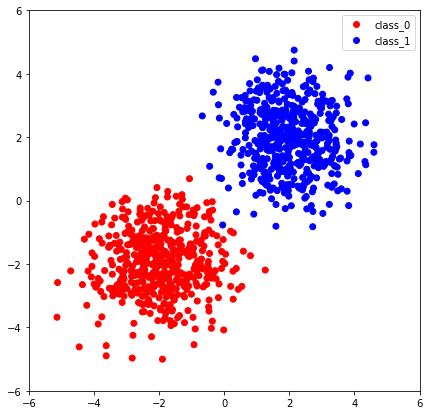

In [5]:
gauss_1 = np.random.multivariate_normal(mean=[-2,-2],cov=[[1,0],[0,1]],size=sample_per_class)
gauss_2 = np.random.multivariate_normal(mean=[2,2],cov=[[1,0],[0,1]],size=sample_per_class)
gauss = np.concatenate([gauss_1,gauss_2])
gauss_label = np.copy(label)

myplot(gauss,gauss_label)

## XOR Distributions

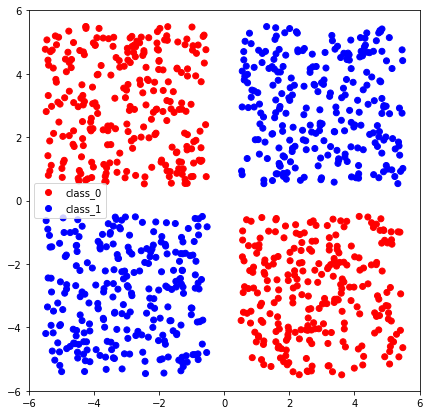

In [49]:
xor_shift = 3
n_xor = int(sample_per_class/2)
xor_1_l = np.random.uniform(-2.5,2.5,(n_xor,2))+np.array([-xor_shift,xor_shift])
xor_1_r = np.random.uniform(-2.5,2.5,(n_xor,2))+np.array([xor_shift,-xor_shift])

xor_2_l = np.random.uniform(-2.5,2.5,(n_xor,2))+np.array([xor_shift,xor_shift])
xor_2_r = np.random.uniform(-2.5,2.5,(n_xor,2))+np.array([-xor_shift,-xor_shift])

xor = np.concatenate([xor_1_l,xor_1_r,xor_2_l,xor_2_r])
xor_label = np.copy(label)

myplot(xor,xor_label)

## Circular Distributions

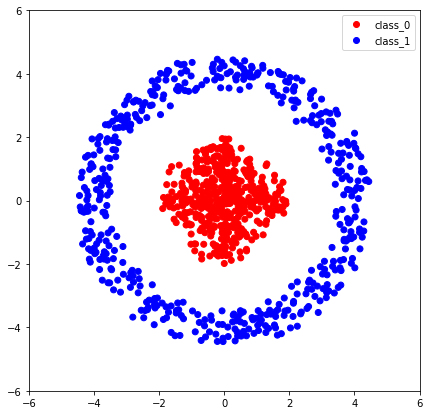

In [10]:
cir_1_angle = np.random.uniform(0,2*np.pi,[sample_per_class,1])
cir_1_r = np.random.uniform(0,2,[sample_per_class,2])
cir_1 = cir_1_r*np.hstack((np.sin(cir_1_angle),np.cos(cir_1_angle)))

cir2_angle = np.random.uniform(0,2*np.pi,[sample_per_class,1])
cir_2 = 4*np.hstack((np.sin(cir2_angle),np.cos(cir2_angle))) + np.random.uniform(-1/2,1/2,[500,2])

circular = np.concatenate([cir_1,cir_2])
cir_label = np.copy(label)

myplot(circular,cir_label)

## Spiral Distributions

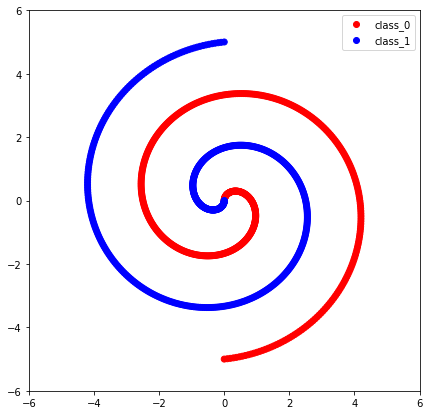

In [8]:
spical_r = np.linspace(start=0,stop=5,num = sample_per_class).reshape(-1,1)
spiral_angle = np.linspace(0,3*np.pi,sample_per_class).reshape(-1,1)

spiral_1 = spical_r*np.hstack((np.sin(spiral_angle),np.cos(spiral_angle)))
spiral_2 = -1*spiral_1

spiral = np.concatenate([spiral_1,spiral_2])
spiral_label = np.copy(label)

myplot(spiral,spiral_label)

# 2.) knn classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN

## Split training, testing data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
g_train,g_test,g_label_train,g_label_test = train_test_split(gauss, gauss_label, test_size=0.5, random_state=99)
x_train,x_test,x_label_train,x_label_test = train_test_split(xor, xor_label, test_size=0.5, random_state=99)
c_train,c_test,c_label_train,c_label_test = train_test_split(circular, cir_label, test_size=0.5, random_state=99)
s_train,s_test,s_label_train,s_label_test = train_test_split(spiral, spiral_label, test_size=0.5, random_state=99)

In [55]:
def pred_viz(data,label,n_neighbors,ret_model=False):
    x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.5, random_state=99)
    knn = KNN(n_neighbors=n_neighbors).fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = sum(pred==y_test)/len(pred)
    print(acc*100,'%')
    class_plot = y_test + ~(pred==y_test)*2 
    plt.figure(figsize=(7,7))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    colors_dict = {0:'red',1:'blue',2:'green',3:'orange'}
    colors = ListedColormap(['red','blue','green','orange'])
    scatter = plt.scatter(x_test[:,0],x_test[:,1],c=[colors_dict[i] for i in class_plot],cmap=colors,label=class_plot)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='class_0',markerfacecolor='red', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='class_1',markerfacecolor='blue', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='class_0 miss',markerfacecolor='green', markersize=7),
                       Line2D([0], [0], marker='o', color='w', label='class_1 miss',markerfacecolor='orange', markersize=7)
                         ]

    plt.legend(handles=legend_elements)
    if ret_model :
        return knn

## Gaussian data

### knn k=1

99.6 %


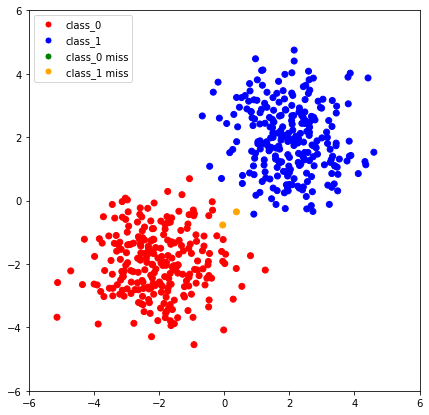

In [56]:
knn_gauss_k1 = pred_viz(gauss,gauss_label,1,ret_model=True)

### knn k=3

99.6 %


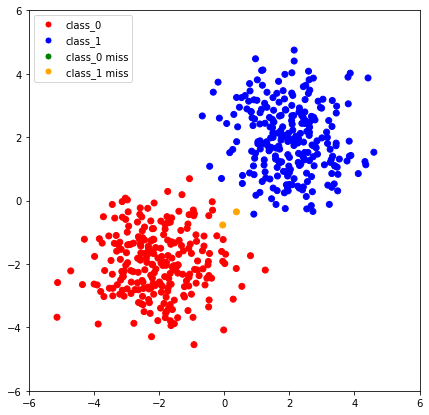

In [57]:
knn_gauss_k3 = pred_viz(gauss,gauss_label,3,ret_model=True)

### knn k=5

99.6 %


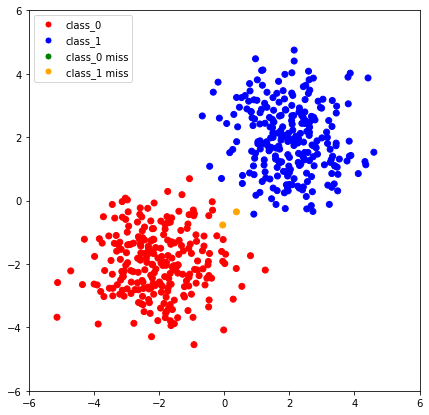

In [58]:
knn_gauss_k5 = pred_viz(gauss,gauss_label,5,ret_model=True)

## XOR data

### knn k=1

100.0 %


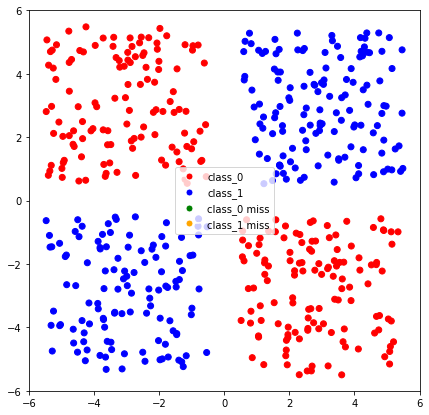

In [59]:
knn_xor_k1 = pred_viz(xor,xor_label,1,ret_model=True)

### knn k=3

100.0 %


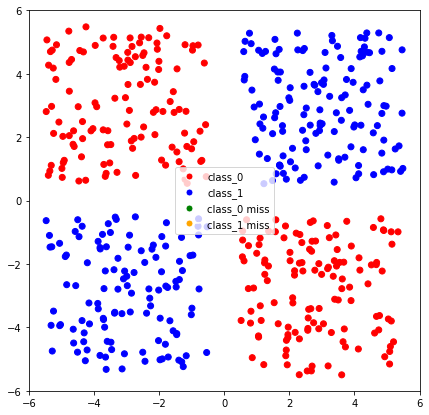

In [60]:
knn_xor_k3 = pred_viz(xor,xor_label,3,ret_model=True)

### knn k=5

100.0 %


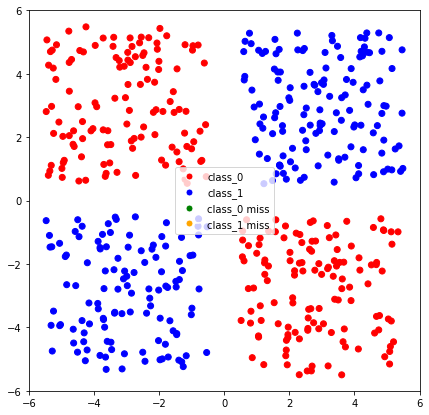

In [61]:
knn_xor_k5 = pred_viz(xor,xor_label,5,ret_model=True)

## Circular data

### knn k=1

99.0 %


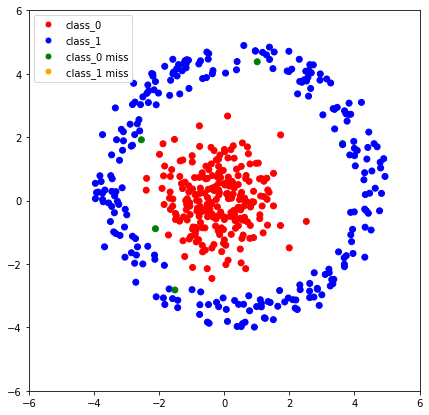

In [62]:
knn_cir_k1 = pred_viz(circular,cir_label,1,ret_model=True)

### knn k=3

99.0 %


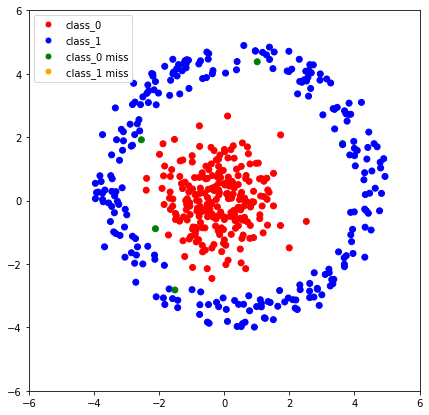

In [20]:
knn_cir_k3 = pred_viz(circular,cir_label,3,ret_model=True)

### knn k=5

99.0 %


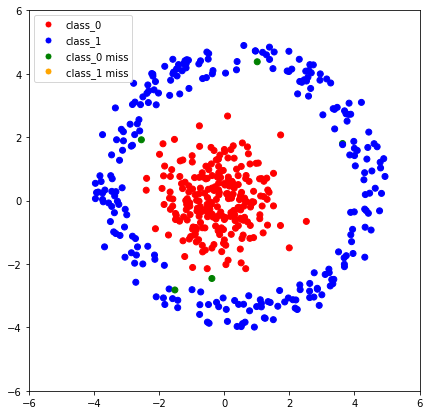

In [21]:
knn_cir_k5 = pred_viz(circular,cir_label,5,ret_model=True)

## Spiral data

### knn k=1

99.6 %


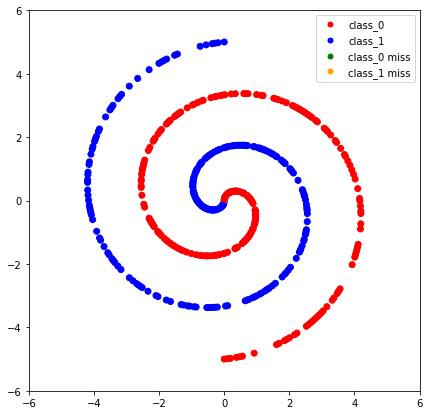

In [22]:
knn_spiral_k1 = pred_viz(spiral,spiral_label,1,ret_model=True)

### knn k=3

99.6 %


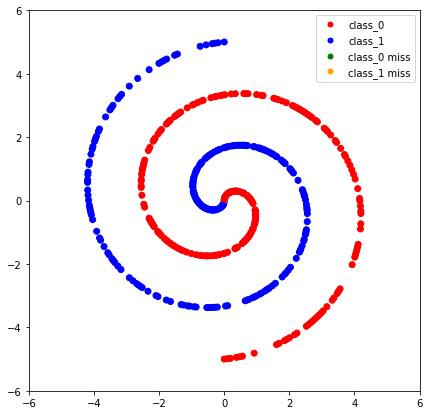

In [23]:
knn_spiral_k3 = pred_viz(spiral,spiral_label,3,ret_model=True)

### knn k=5

99.8 %


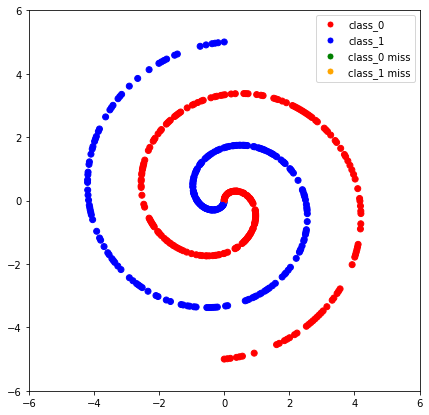

In [24]:
knn_spiral_k5 = pred_viz(spiral,spiral_label,5,ret_model=True)

# Decision boundary

In [25]:
def plot_decisionBoundary(model,data,label,plot_min=-6,plot_max=6):
    xx,yy = np.meshgrid(np.arange(plot_min,plot_max,0.05),np.arange(plot_min,plot_max,0.05))
    pred_db = model.predict(np.c_[xx.ravel(),yy.ravel()])
    colors = ListedColormap(['red','blue'])
    colors_db = ['pink','cyan']
    plt.figure(figsize=(7,7))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.contourf(xx,yy,pred_db.reshape(xx.shape),cmap=matplotlib.colors.ListedColormap(colors_db))
    scatterplot = plt.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    plt.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])

## Gaussian data

### knn k=1

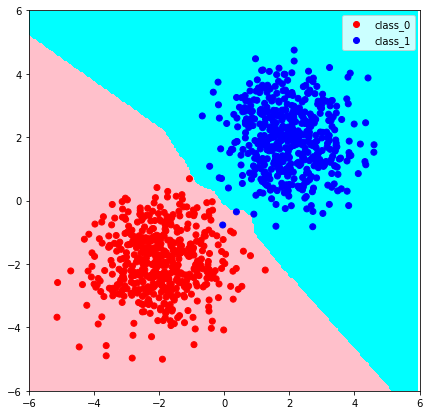

In [26]:
plot_decisionBoundary(knn_gauss_k1,gauss,gauss_label)

### knn k=3

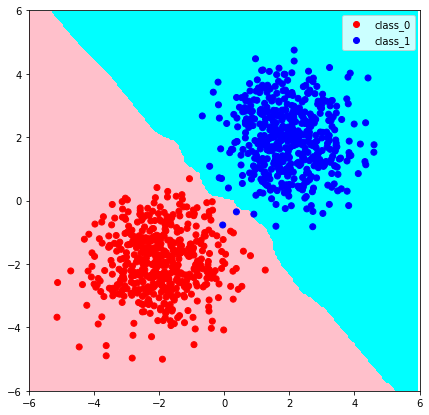

In [27]:
plot_decisionBoundary(knn_gauss_k3,gauss,gauss_label)

### knn k=5

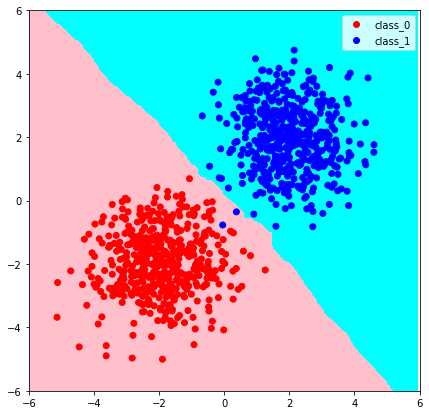

In [28]:
plot_decisionBoundary(knn_gauss_k5,gauss,gauss_label)

## Xor data

### knn k=1

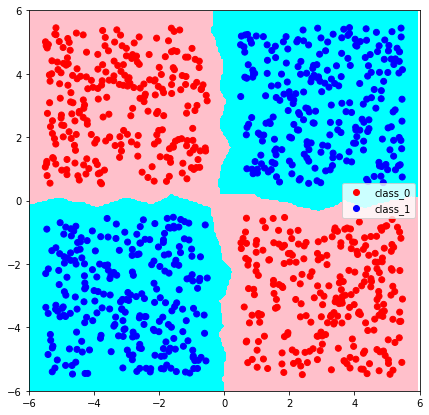

In [29]:
plot_decisionBoundary(knn_xor_k1,xor,xor_label)

### knn k=3

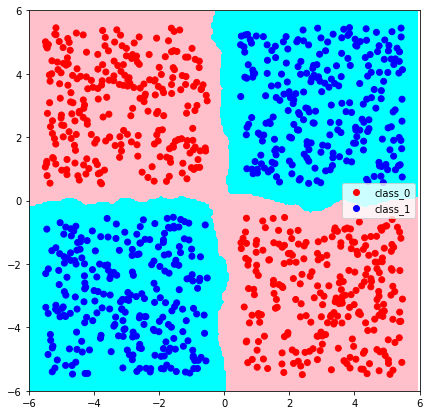

In [30]:
plot_decisionBoundary(knn_xor_k3,xor,xor_label)

### knn k=5

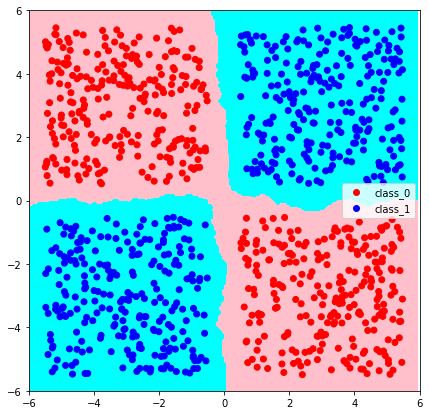

In [31]:
plot_decisionBoundary(knn_xor_k5,xor,xor_label)

## Circular data

### knn k=1

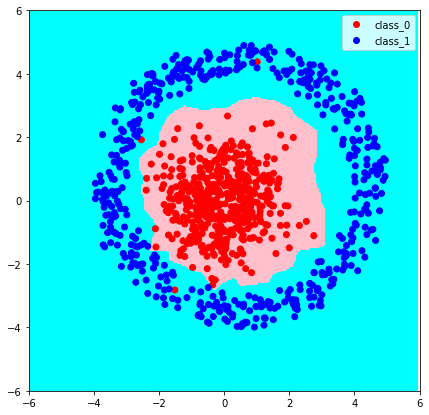

In [32]:
plot_decisionBoundary(knn_cir_k1,circular,cir_label)

### knn k=3

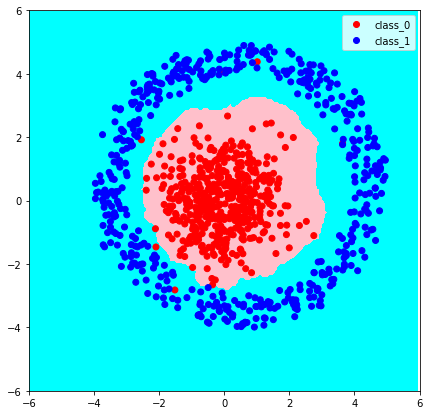

In [33]:
plot_decisionBoundary(knn_cir_k3,circular,cir_label)

### knn k=5

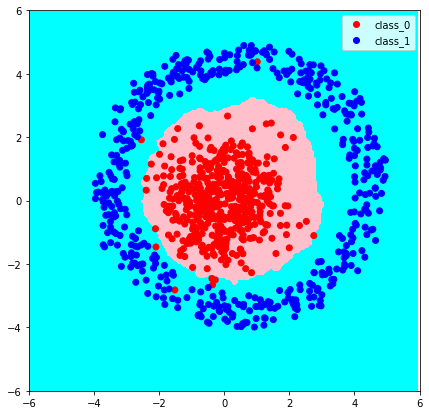

In [34]:
plot_decisionBoundary(knn_cir_k5,circular,cir_label)

## Spiral data

### knn k=1

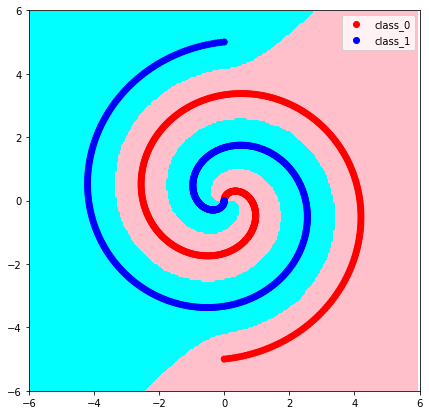

In [35]:
plot_decisionBoundary(knn_spiral_k1,spiral,spiral_label)

### knn k=3

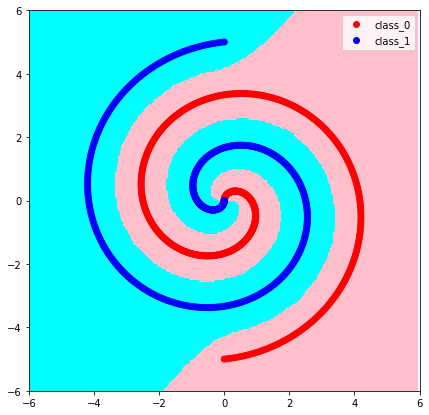

In [36]:
plot_decisionBoundary(knn_spiral_k3,spiral,spiral_label)

### knn k=5

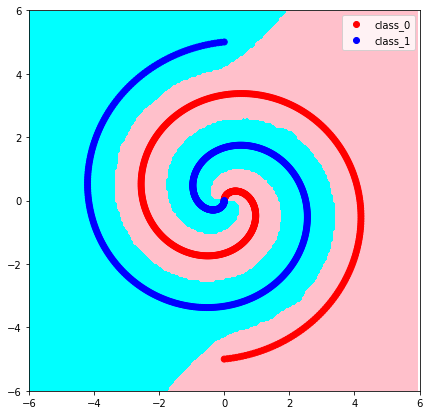

In [37]:
plot_decisionBoundary(knn_spiral_k5,spiral,spiral_label)

# Additional 
### (Animation Decision boundary by k)

In [39]:
from matplotlib import animation

In [40]:
from IPython.display import display,HTML

In [41]:
def update_gauss(k):
    data= gauss
    label = gauss_label
    plot_min=-6
    plot_max=6
    x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.5, random_state=99)
    model = KNN(n_neighbors=k+1).fit(x_train,y_train)
    xx,yy = np.meshgrid(np.arange(plot_min,plot_max,0.05),np.arange(plot_min,plot_max,0.05))
    pred_db = model.predict(np.c_[xx.ravel(),yy.ravel()])
    colors = ListedColormap(['red','blue'])
    colors_db = ['pink','cyan']
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    ax.contourf(xx,yy,pred_db.reshape(xx.shape),cmap=matplotlib.colors.ListedColormap(colors_db))
    scatterplot = ax.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    ax.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])
    ax.set_title('gaussian knn k = '+str(k+1))
    plt.close()

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
anim_gauss = animation.FuncAnimation(fig, update_gauss, frames=15,interval=500, repeat=True)
plt.close()
HTML(anim_gauss.to_jshtml())

In [43]:
def update_xor(k):
    data= xor
    label = xor_label
    plot_min=-6
    plot_max=6
    x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.5, random_state=99)
    model = KNN(n_neighbors=k+1).fit(x_train,y_train)
    xx,yy = np.meshgrid(np.arange(plot_min,plot_max,0.05),np.arange(plot_min,plot_max,0.05))
    pred_db = model.predict(np.c_[xx.ravel(),yy.ravel()])
    colors = ListedColormap(['red','blue'])
    colors_db = ['pink','cyan']
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    ax.contourf(xx,yy,pred_db.reshape(xx.shape),cmap=matplotlib.colors.ListedColormap(colors_db))
    scatterplot = ax.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    ax.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])
    ax.set_title('xor knn k = '+str(k+1))
    plt.close()

In [44]:
fig, ax = plt.subplots(figsize=(5,5))
anim_xor = animation.FuncAnimation(fig, update_xor, frames=15,interval=500, repeat=True)
plt.close()
HTML(anim_xor.to_jshtml())

In [45]:
def update_cir(k):
    data= circular
    label = cir_label
    plot_min=-6
    plot_max=6
    x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.5, random_state=99)
    model = KNN(n_neighbors=k+1).fit(x_train,y_train)
    xx,yy = np.meshgrid(np.arange(plot_min,plot_max,0.05),np.arange(plot_min,plot_max,0.05))
    pred_db = model.predict(np.c_[xx.ravel(),yy.ravel()])
    colors = ListedColormap(['red','blue'])
    colors_db = ['pink','cyan']
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    ax.contourf(xx,yy,pred_db.reshape(xx.shape),cmap=matplotlib.colors.ListedColormap(colors_db))
    scatterplot = ax.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    ax.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])
    ax.set_title('circular knn k = '+str(k+1))
    plt.close()

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
plt.close()
anim_cir = animation.FuncAnimation(fig, update_cir, frames=15,interval=500, repeat=True)
HTML(anim_cir.to_jshtml())

In [47]:
def update_spiral(k):
    data= spiral
    label = spiral_label
    plot_min=-6
    plot_max=6
    x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.5, random_state=99)
    model = KNN(n_neighbors=k+1).fit(x_train,y_train)
    xx,yy = np.meshgrid(np.arange(plot_min,plot_max,0.05),np.arange(plot_min,plot_max,0.05))
    pred_db = model.predict(np.c_[xx.ravel(),yy.ravel()])
    colors = ListedColormap(['red','blue'])
    colors_db = ['pink','cyan']
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    ax.contourf(xx,yy,pred_db.reshape(xx.shape),cmap=matplotlib.colors.ListedColormap(colors_db))
    scatterplot = ax.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    ax.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])
    ax.set_title('spiral knn k = '+str(k+1))
    plt.close()

In [48]:
fig, ax = plt.subplots(figsize=(5,5))
plt.close()
anim_spiral = animation.FuncAnimation(fig, update_spiral, frames=15,interval=500, repeat=True)
HTML(anim_spiral.to_jshtml())